In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv',error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
data['strength'].unique()

array([1, 2, 0])

In [4]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [5]:
## which row i have null value 
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [6]:
## droping this row 

data.dropna(inplace=True)

In [7]:
data.isna().sum()

password    0
strength    0
dtype: int64

In [8]:
## seee we have nox nan values now 

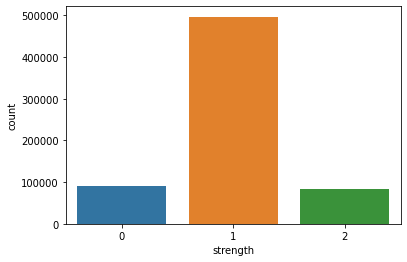

In [9]:
## data analysis 

sns.countplot(data['strength'])

In [10]:
## here we can see most passwords are in strength 1 so if we train model based on this it will give baiesd 
## results so we have to preprocess the data first



In [11]:
password_tuple = np.array(data)
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [12]:
## always shuffle your data before passing it to machine learning models as it will give it a robustness 

In [13]:
import random as rd
rd.shuffle(password_tuple)

In [14]:
## Now we can see here passworxd is independent data and strength is dependent data so 
## we willx give whole passwords arry to x and strength to y variable



In [15]:
x = [z[0] for z in password_tuple]
y = [z[1] for z in password_tuple]

In [16]:
print(x[:5],y[:5])

['kzde5577', 'kino3434', 'kzde5577', 'kzde5577', 'megzy123'] [1, 1, 1, 1, 1]


In [17]:
### now we have to apply the algrithm of TF-IDF
### for it we have to sirst convert words into char

def words_to_char(inp):
    chars = []
    for x in inp:
        chars.append(x)
    return chars
    

In [18]:
words_to_char("aasdhbjh123jhv")

['a', 'a', 's', 'd', 'h', 'b', 'j', 'h', '1', '2', '3', 'j', 'h', 'v']

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vec = TfidfVectorizer(tokenizer=words_to_char)

In [21]:
X = vec.fit_transform(x)

In [22]:
X.shape

(669639, 129)

In [23]:
vec.get_feature_names()

['\x01',
 '\x04',
 '\x05',
 '\x06',
 '\x0e',
 '\x0f',
 '\x10',
 '\x12',
 '\x16',
 '\x17',
 '\x18',
 '\x19',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '¡',
 '¦',
 '¨',
 '«',
 '¯',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '·',
 'º',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'é',
 'ê',
 'í',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'œ',
 '—',
 '‚',
 '‹',
 '›']

In [24]:
first_doc_vector = X[0]

In [25]:
first_doc_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56702646],
        [0.        ],
        [0.59096989],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [26]:
df = pd.DataFrame(first_doc_vector.T.todense(),index=vec.get_feature_names(),columns=["TF-IDF"])
df.sort_values(by=["TF-IDF"],ascending=False)

,TF-IDF
7,0.590970
5,0.567026
z,0.336553
k,0.291708
d,0.286086
...,...
;,0.000000
9,0.000000
8,0.000000
6,0.000000


In [27]:
## here data preprocessing is over now we will jump to machine learning algorithms

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression(random_state=0,multi_class='multinomial')

In [32]:
model.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [33]:
temp = np.array(["randompassword"])
predictions = vec.transform(temp)

In [34]:
model.predict(predictions)

array([1])

In [35]:
y_prediction = model.predict(x_test)

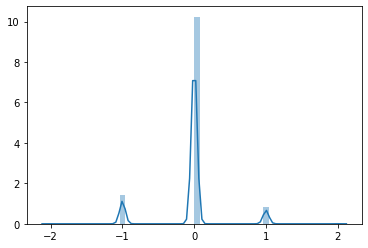

In [36]:
sns.distplot(y_test-y_prediction)

In [37]:
import sklearn
import math
mse = sklearn.metrics.mean_squared_error(y_test, y_prediction)

rmse = math.sqrt(mse)

print(rmse)

0.426422922893582


In [38]:
## check aacuracy 

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [40]:
cms = confusion_matrix(y_test,y_prediction)
acs = accuracy_score(y_test,y_prediction)
print(cms,acs)

[[ 5359 12618    11]
 [ 3959 93026  2492]
 [   44  5064 11355]] 0.81939549608745


In [41]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.57      0.30      0.39     17988
           1       0.84      0.94      0.89     99477
           2       0.82      0.69      0.75     16463

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.68    133928
weighted avg       0.80      0.82      0.80    133928



In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
from sklearn import metrics

def predict_info(ml_model):
    model = ml_model.fit(X_train,y_train)
#     print("Score is {}".format(model.score(X_train,y_train)))
    predictions =  model.predict(x_test)
#     print("Prediction is {}".format(predictions))
#     print("\n")
#     r2_score = metrics.r2_score(y_test,predictions)
#     print("r2_score is {} so {:.2f}% accuracy is there".format(r2_score,r2_score*100))
    
    print("Mean Absolute Error is {}".format(metrics.mean_absolute_error(y_test,predictions)))
#     print("Mean Squared Error is {}".format(metrics.mean_squared_error(y_test,predictions)))
#     print("Root Mean Absolute Error is {}".format(np.sqrt(metrics.mean_absolute_error(y_test,predictions))))
    
#     sns.distplot(y_test-predictions)

In [ ]:
predict_info(DecisionTreeRegressor())